In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [5]:
def readAll():
    data = np.array([])
    fileIndex = [(), (1, 4), (1, 8), (2, 4), (2, 8)]
    
    for fileNum in range(1, 5):
        fileName = '../Gene Data/Donor%s_CD%s_Genes.csv' % fileIndex[fileNum]
        dataFile = pd.read_csv(
            fileName, 
            usecols = [
                'MT-ND1', 'MT-ND2', 'MT-ND3', 
                'MT-ND4', 'MT-ND4L', 
                'MT-ND5', 'MT-ND6', 
                'MT-CO1', 'MT-CO2', 'MT-CO3', 
                'MT-ATP8', 'MT-ATP6', 
                'MT-CYB', 
                'MT-RNR1', 'MT-RNR2', 'non-MT'
            ]
        ).astype('float32')
        
        if fileNum == 1:
            data = dataFile.to_numpy()
        else:
            data = np.append(data, dataFile.to_numpy(), axis = 0)
    
    for i in range(len(data)):
        data[i] = data[i] / data[i][15]
    name = dataFile.columns.values[:15]
    ave = np.array([np.average(d) for d in data.transpose()])
    cv = np.array([np.std(d) / np.average(d) for d in data.transpose()])
    
    return(name, ave[:15], cv[:15])

In [6]:
def readFile(fileIndex):    
    usecol = [
        'MT-ND1', 'MT-ND2', 'MT-ND3', 
        'MT-ND4', 'MT-ND4L', 
        'MT-ND5', 'MT-ND6', 
        'MT-CO1', 'MT-CO2', 'MT-CO3', 
        'MT-ATP8', 'MT-ATP6', 
        'MT-CYB', 
        'MT-RNR1', 'MT-RNR2', 'non-MT'
    ]
    fileInd = [(), (1, 4), (1, 8), (2, 4), (2, 8)]
    if fileIndex == 0:
        return(readAll())
    elif fileIndex == 5:
        fileName = '../Gene Data/smartseq_mitogenes.csv'
        usecol[15] = 'Non-MT'
    else: 
        fileName = '../Gene Data/Donor%s_CD%s_Genes.csv' % fileInd[fileIndex]
    dataFile = pd.read_csv(fileName, usecols = usecol).astype('float32')

    data = dataFile.to_numpy()
    for i in range(len(data)):
        data[i] = data[i] / data[i][15]
    name = dataFile.columns.values[:15]
    ave = np.array([np.average(d) for d in data.transpose()])
    cv = np.array([np.std(d) / np.average(d) for d in data.transpose()])
    
    return(name, ave[:15], cv[:15])

In [7]:
def TLInitialize(ref):
    # Productions
    p1 = np.zeros(15)
    p1[13] = 1 # ND6
    p2 = np.ones(15)
    p2[13] = 0
    p3 = np.zeros(15)
    p3[0] = 1
    p3[1] = 1
    v = [p1, p2, p3]

    # Degradation
    d = []
    for i in range(15):
        z = np.zeros(15)
        z[i] = -1
        d.append(z)
    v += d
    
    # Coefficients
    coef = 1 / ref
    for i in range(2, 15):
        if i == 13:
            continue
        coef[i] = coef[i] * 0.9
    coef /= 2 / np.average(np.log(2) / coef[2:15] / 60)
    
    c = [20 * 100, 18 * 100, 2 * 100] + list(coef)
    
    return(c, v)

In [8]:
def ShowProcess(results, t_current):
    t_list = np.linspace(0, t_current - 1, t_current)
    for i in range(15):
        plt.plot(t_list, [np.average(data) for data in np.transpose(results, (2, 1, 0))[i]])
    plt.show()

In [9]:
with open("data.pickle", "rb") as file:
    result_list, result_5, aves_, ave5, name = pickle.load(file)

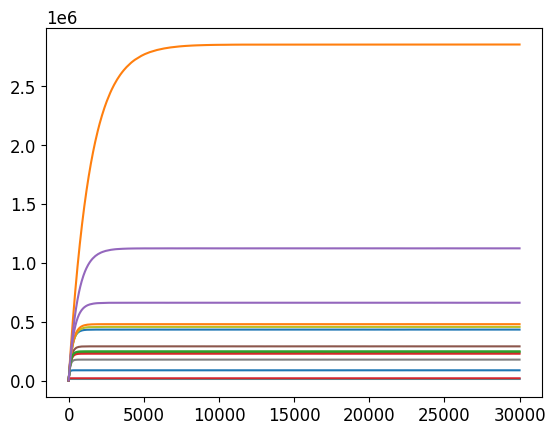

In [10]:
ShowProcess(result_5[0], result_5[1])

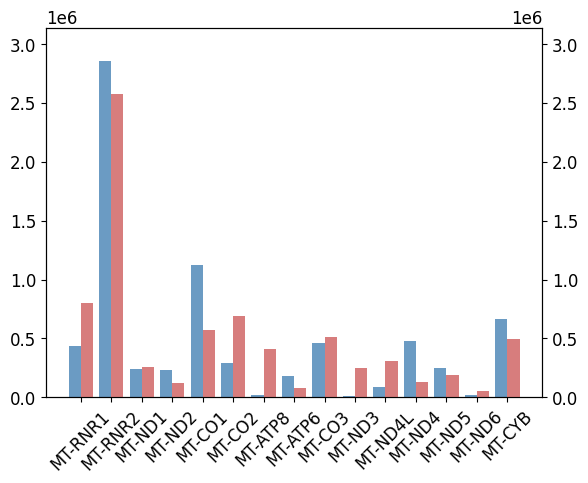

In [11]:
results = result_5[0]
ref = result_list[4]
t_current = min(results.shape[1], ref.shape[1])
name = name

data = [np.average(dataCell) for dataCell in np.transpose(results, (1, 2, 0))[t_current - 1]]
ref_data = [np.average(dataCell) for dataCell in np.transpose(ref, (1, 2, 0))[t_current - 1]]

fig = plt.figure()
bar_width = 0.4

ax = fig.add_subplot(111)
ax.set_ylim([0, np.max(data) * 1.1])
ax.bar(x = np.arange(len(name)), width = bar_width, height = data, label='y1', fc = 'steelblue', alpha = 0.8)

ax1 = ax.twinx()
ax1.set_ylim([0, np.max(data) * 1.1])
ax1.bar(x = np.arange(len(name)) + bar_width, width = bar_width, height = ref_data, label='y1', fc = 'indianred', alpha = 0.8)

plt.xticks(np.arange(len(name)) + bar_width / 2, name) 
ax.tick_params(axis = 'x', labelrotation = 45)

plt.show()

In [12]:
plt.rcdefaults()
font = {'size'   : 16}
plt.rc('font', **font)

fig, axs = plt.subplots(5, 4, dpi = 400, figsize = (40, 30))
for axis in axs:
    for ax in axis:
        ax.set_xticks([])

bar_width = 0.4

for i in range(5):
    for j in range(4):
        data_1 = [np.average(dataCell) for dataCell in np.transpose(result_list[i], (1, 2, 0))[-1]]
        data_2 = aves_[j]

        ax = axs[i][j]
        ax.set_ylim([0, np.max(data_1) * 1.1 * np.max(aves_[:4]) / np.max(aves_[i])])
        ax.bar(x = np.arange(len(name)), width = bar_width, height = data_1, label='y1', fc = 'steelblue', alpha = 0.8)

        ax1 = ax.twinx()
        ax1.set_ylim([0, np.max(aves_[:4]) * 1.1])
        ax1.bar(x = np.arange(len(name)) + bar_width, width = bar_width, height = data_2, label='y1', fc = 'indianred', alpha = 0.8)

        # plt.xticks(np.arange(len(name)) + bar_width / 2, name) 
        # ax.tick_params(axis = 'x', labelrotation = 45)

labels = ['D1CD4', 'D1CD8', 'D2CD4', 'D2CD8', 'Average']
for i in range(4):
    plt.setp(axs[-1, i], xlabel = labels[i])
    plt.setp(axs[i, 0], ylabel = labels[i])
plt.setp(axs[4, 0], ylabel = labels[4])

plt.show()

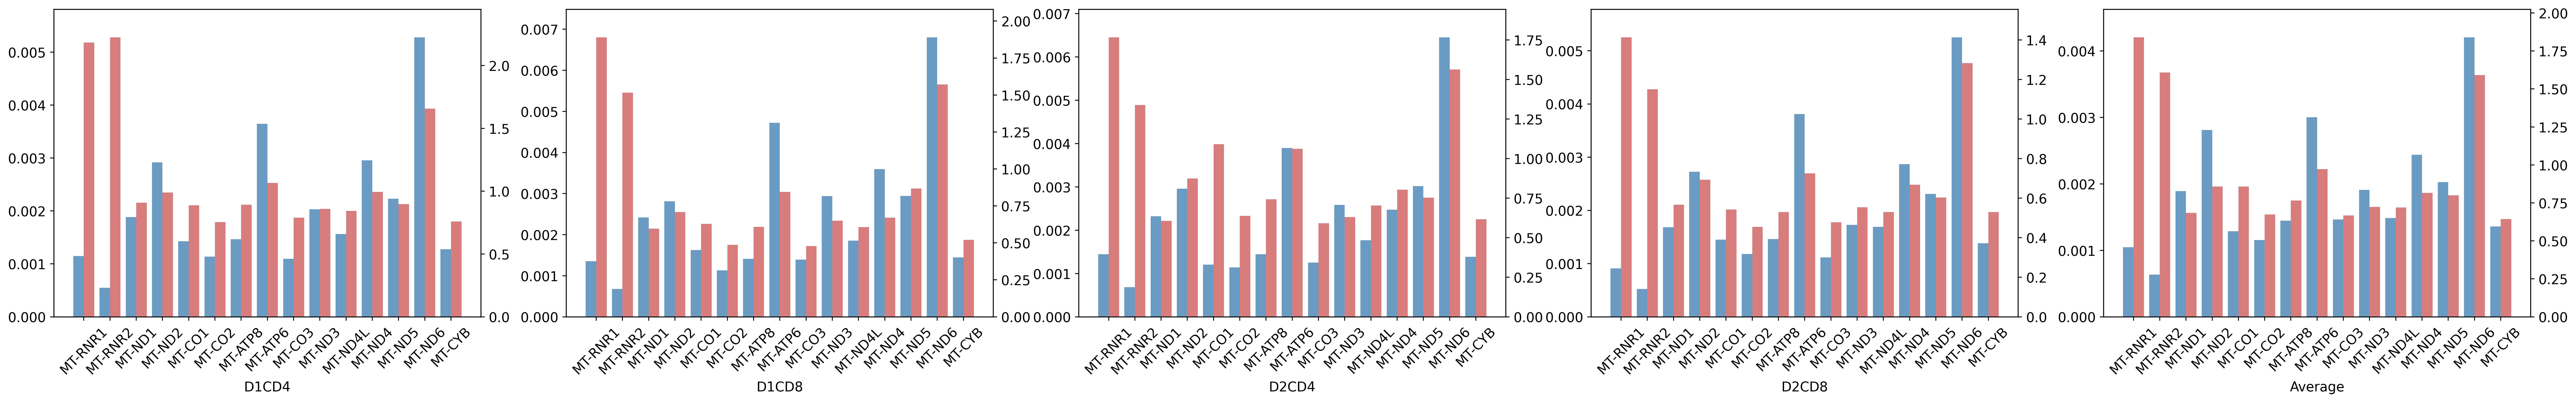

In [13]:
plt.rcdefaults()
font = {'size'   : 12}
plt.rc('font', **font)
fig, axs = plt.subplots(1, 5, dpi = 400, figsize = (40, 5))
bar_width = 0.4

for i in range(5):
    t_current = result_list[i - 1].shape[1]
    
    data_ = [np.std(dataCell) / np.average(dataCell) for dataCell in np.transpose(result_list[i - 1], (1, 2, 0))[t_current - 1]]

    ax = axs[i - 1]
    ax.set_ylim([0, np.max(data_) * 1.1])
    ax.bar(x = np.arange(len(name)), width = bar_width, height = data_, label='y1', fc = 'steelblue', alpha = 0.8)

    ax1 = ax.twinx()
    ax1.set_ylim([0, np.max(readFile(i)[2]) * 1.1])
    ax1.bar(x = np.arange(len(name)) + bar_width, width = bar_width, height = readFile(i)[2], label='y1', fc = 'indianred', alpha = 0.8)

    plt.xticks(np.arange(len(name)) + bar_width / 2, name) 
    ax.tick_params(axis = 'x', labelrotation = 45)
    
    plt.setp(ax, xlabel = labels[i - 1])

plt.show()

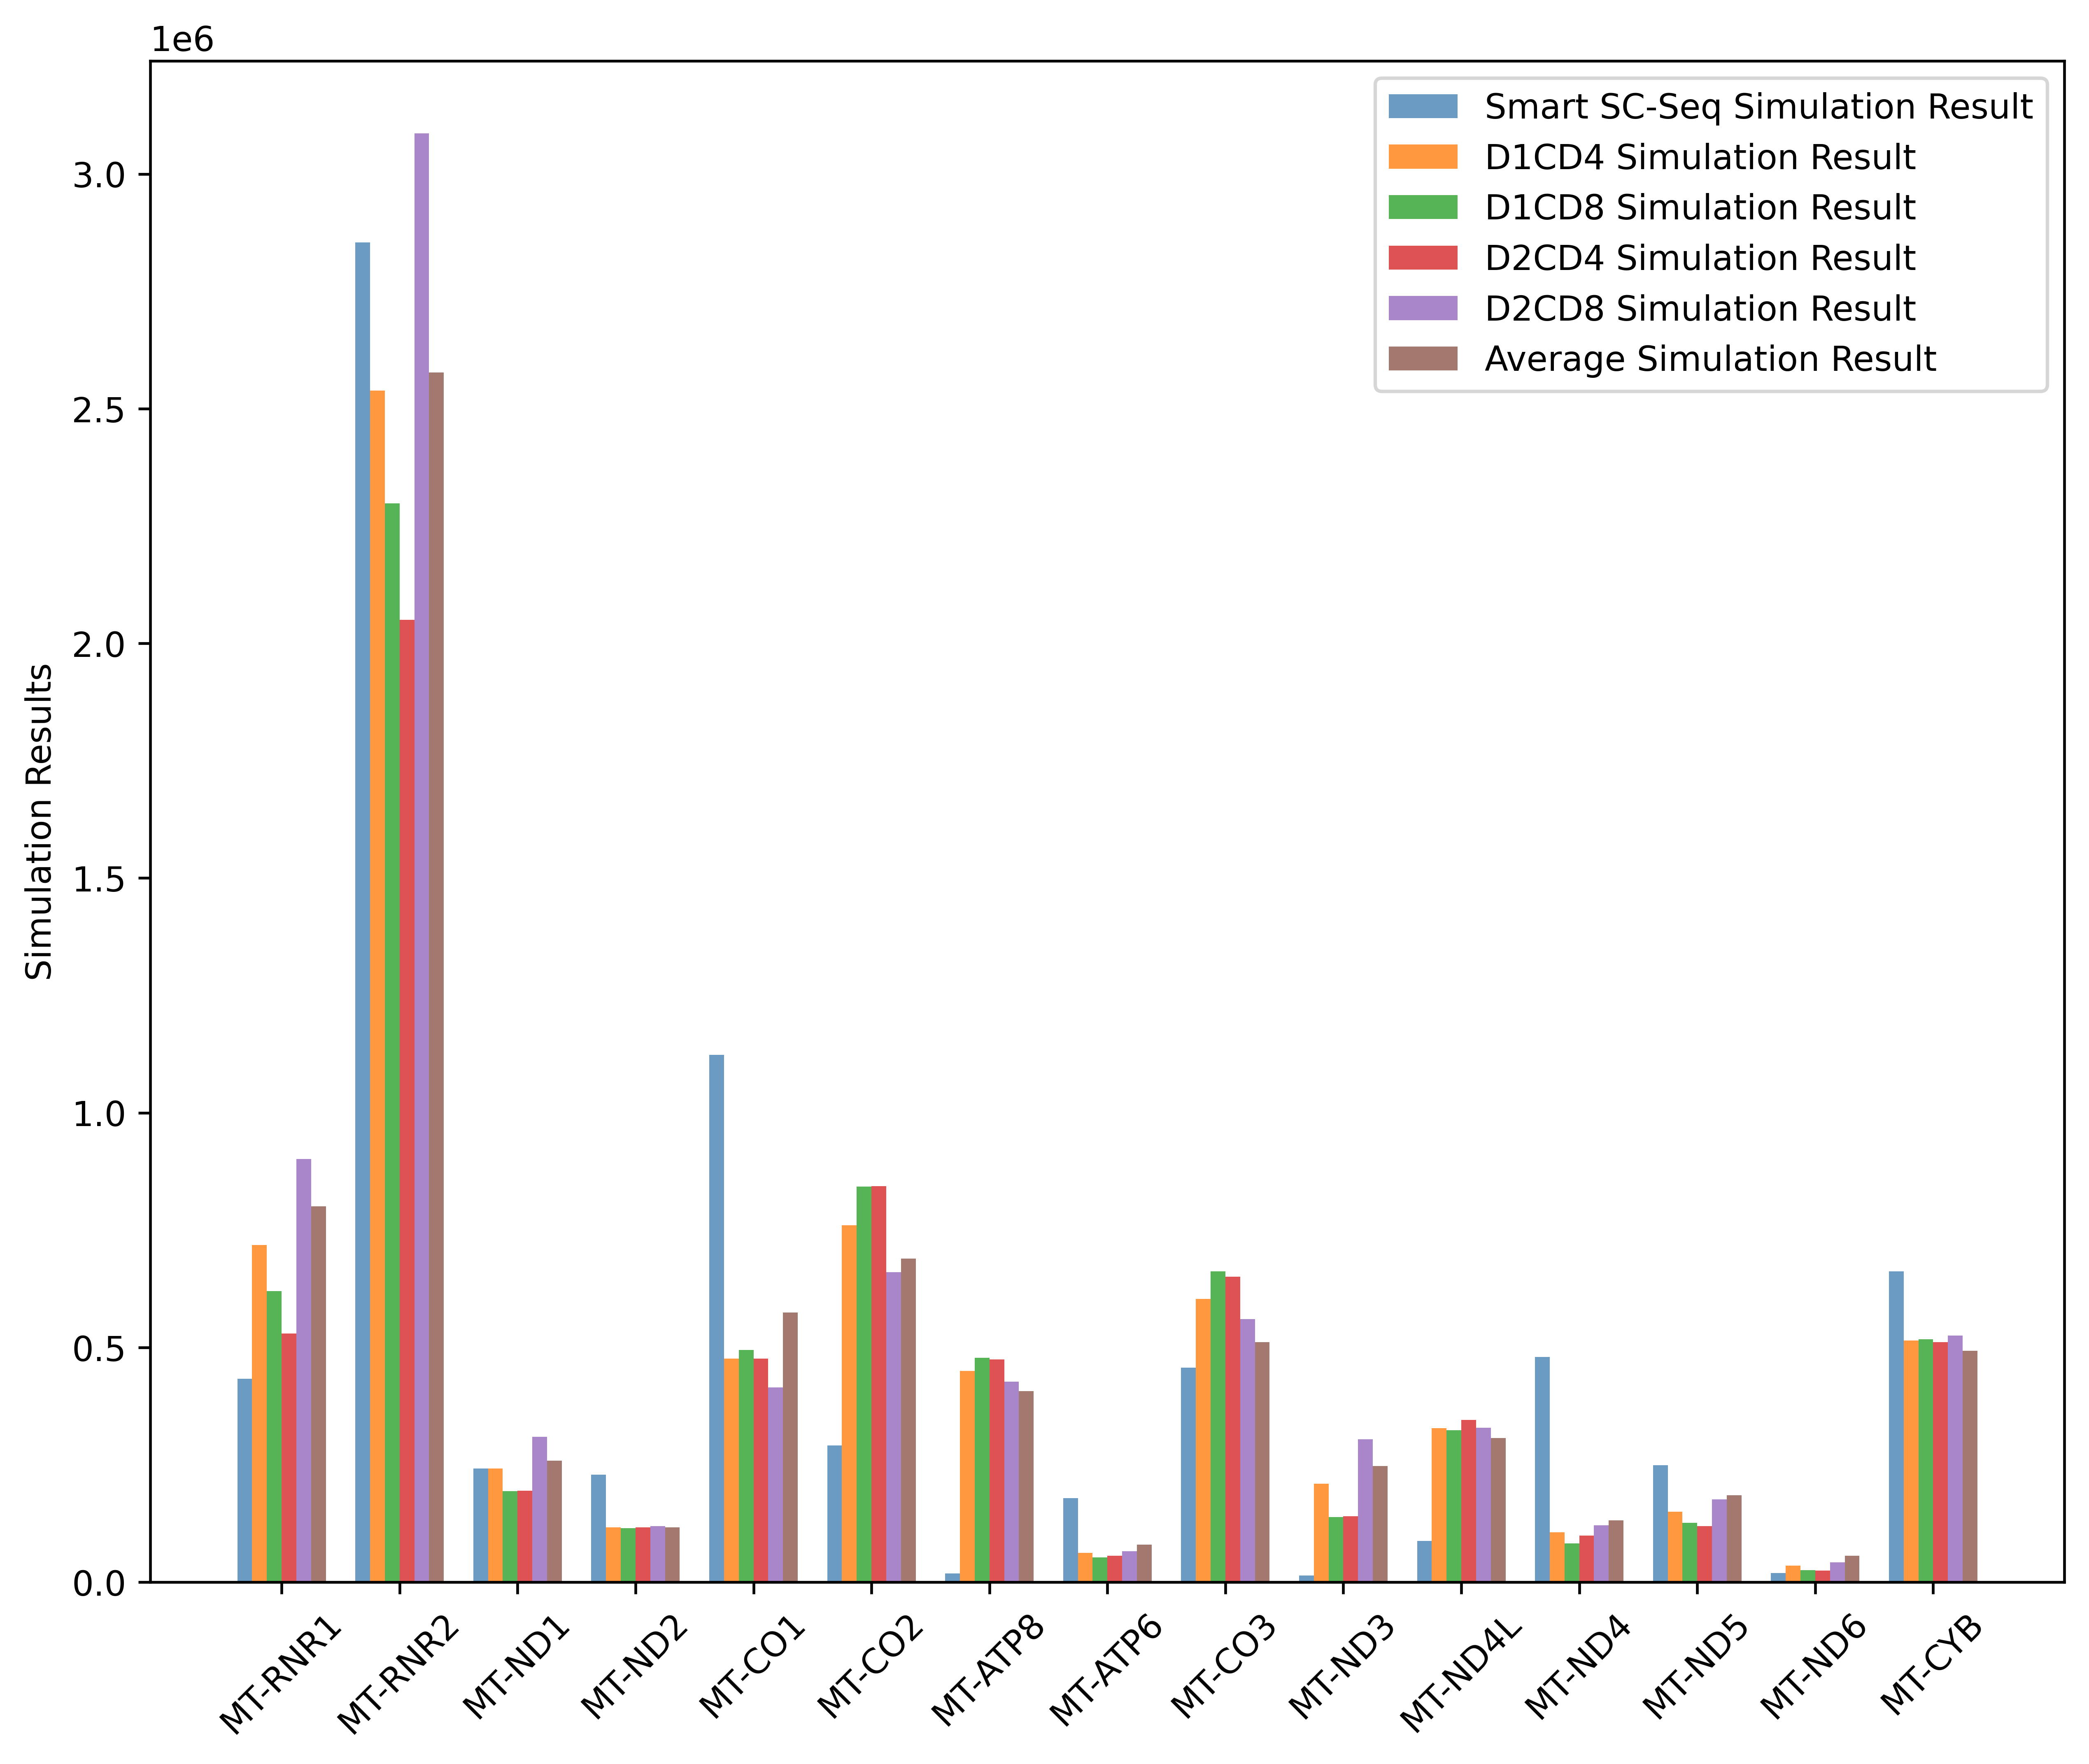

In [14]:
ref = result_5[0]
ref_data = [np.average(dataCell) for dataCell in np.transpose(ref, (1, 2, 0))[-1]]

plt.rcdefaults()
fig = plt.figure(figsize = (10, 8), dpi = 600)
bar_width = 0.125

ax = fig.add_subplot(111)
ax.bar(x = np.arange(len(name)), width = bar_width, height = ref_data, fc = 'steelblue', alpha = 0.8, label = 'Smart SC-Seq Simulation Result')
ax.set_ylabel('Simulation Results')

for i in range(5):
    data_ = [np.average(dataCell) for dataCell in np.transpose(result_list[i], (1, 2, 0))[-1]]
    ax.bar(x = np.arange(len(name)) + bar_width * (i + 1), width = bar_width, height = data_, alpha = 0.8, label = labels[i] + ' Simulation Result')
plt.legend()

'''
ax1 = ax.twinx()
ax1.set_ylim([0, np.max(ave5[:15]) * 1.12])
ax1.bar(x = np.arange(len(name)) + bar_width * 6, width = bar_width, height = ave5[:15], fc = 'indianred', alpha = 0.8, label = 'Smart SC-Seq Processed Data')
ax1.set_ylabel('Processed Data')
plt.legend(loc = 'upper left')
'''

plt.xticks(np.arange(len(name)) + bar_width * 2.5, name) 
ax.tick_params(axis = 'x', labelrotation = 45)

plt.show()

In [15]:
ave_table = pd.DataFrame(
    np.transpose(aves_), 
    columns = ['D1CD4', 'D1CD8', 'D2CD4', 'D2CD8', 'Average', 'Smart SC-Seq']
)
ave_table

,D1CD4,D1CD8,D2CD4,D2CD8,Average,Smart SC-Seq
0,0.006236,0.006000,0.007347,0.008886,0.007117,0.008206
1,0.023121,0.023225,0.025145,0.028599,0.025022,0.053988
2,0.001954,0.002209,0.002525,0.002871,0.002390,0.004575
3,0.001158,0.001324,0.000970,0.001297,0.001187,0.004333
4,0.004976,0.005395,0.003379,0.006376,0.005032,0.021253
5,0.008477,0.009562,0.005379,0.007650,0.007767,0.005514
6,0.004809,0.005373,0.003484,0.004513,0.004545,0.000349
7,0.000531,0.000641,0.000534,0.000890,0.000649,0.003383
8,0.006661,0.007370,0.004566,0.005670,0.006067,0.008639
9,0.001396,0.001588,0.002478,0.002746,0.002052,0.000274


In [16]:
decay_coe_table = pd.DataFrame(
    np.transpose(np.array([
        TLInitialize(np.array(avg))[0][3:] for avg in aves_
    ])), 
    columns = ['D1CD4', 'D1CD8', 'D2CD4', 'D2CD8', 'Average', 'Smart SC-Seq']
)
decay_coe_table

,D1CD4,D1CD8,D2CD4,D2CD8,Average,Smart SC-Seq
0,0.003227,0.003777,0.002218,0.002498,0.002855,0.004611
1,0.000870,0.000976,0.000648,0.000776,0.000812,0.000701
2,0.009268,0.009235,0.005809,0.006959,0.007653,0.007443
3,0.015645,0.015399,0.015119,0.015403,0.015403,0.007858
4,0.003640,0.003781,0.004340,0.003133,0.003635,0.001602
5,0.002137,0.002133,0.002726,0.002611,0.002355,0.006175
6,0.003767,0.003796,0.004209,0.004426,0.004024,0.097574
7,0.034096,0.031806,0.027466,0.022443,0.028172,0.010064
8,0.002719,0.002768,0.003212,0.003523,0.003014,0.003942
9,0.012971,0.012846,0.005919,0.007274,0.008912,0.124246


In [17]:
decay_coe_mat = np.transpose(np.array([TLInitialize(np.array(avg))[0][3:] for avg in aves_]))

for i in range(15):
    print('%s & %.6f & %.6f & %.6f & %.6f & %.6f & %.6f \\\\' % tuple([name[i]] + list(decay_coe_mat[i])))

MT-RNR1 & 0.003227 & 0.003777 & 0.002218 & 0.002498 & 0.002855 & 0.004611 \\
MT-RNR2 & 0.000870 & 0.000976 & 0.000648 & 0.000776 & 0.000812 & 0.000701 \\
MT-ND1 & 0.009268 & 0.009235 & 0.005809 & 0.006959 & 0.007653 & 0.007443 \\
MT-ND2 & 0.015645 & 0.015399 & 0.015119 & 0.015403 & 0.015403 & 0.007858 \\
MT-CO1 & 0.003640 & 0.003781 & 0.004340 & 0.003133 & 0.003635 & 0.001602 \\
MT-CO2 & 0.002137 & 0.002133 & 0.002726 & 0.002611 & 0.002355 & 0.006175 \\
MT-ATP8 & 0.003767 & 0.003796 & 0.004209 & 0.004426 & 0.004024 & 0.097574 \\
MT-ATP6 & 0.034096 & 0.031806 & 0.027466 & 0.022443 & 0.028172 & 0.010064 \\
MT-CO3 & 0.002719 & 0.002768 & 0.003212 & 0.003523 & 0.003014 & 0.003942 \\
MT-ND3 & 0.012971 & 0.012846 & 0.005919 & 0.007274 & 0.008912 & 0.124246 \\
MT-ND4L & 0.005564 & 0.005204 & 0.005474 & 0.005870 & 0.005518 & 0.020404 \\
MT-ND4 & 0.021766 & 0.018099 & 0.014864 & 0.013712 & 0.016615 & 0.003752 \\
MT-ND5 & 0.014269 & 0.015036 & 0.010210 & 0.009728 & 0.011961 & 0.007211 \\
MT-ND6 